In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
#한글 깨짐 방지
from matplotlib import rc, font_manager
font_path='data/fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
#마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus']=False

In [3]:
# 데이터 불러오기
mackerel_output=pd.read_csv('./data/mackerel/부산_고등어_생산량(선어).csv',encoding='cp949')
temperature_jung=pd.read_csv('./data/temperature/207정선_월별.csv')
temperature_jung_output=pd.merge(temperature_jung,mackerel_output,on=['년도','월'])
temperature_jung_output

,년도,월,수온,생산량
0,2008,1,15.75,7994
1,2008,2,14.80,1430
2,2008,3,14.30,3001
3,2008,4,13.80,1385
4,2008,5,14.35,582
...,...,...,...,...
175,2022,8,20.00,3900
176,2022,9,21.35,5494
177,2022,10,22.70,5339
178,2022,11,19.55,24533


In [6]:
month_temperature_jung=temperature_jung_output[temperature_jung_output['월']==7]
month_temperature_jung=month_temperature_jung.reset_index().drop(columns='index')
month_temperature_jung.iloc[:,2:].corr()

,수온,생산량
수온,1.000000,0.329247
생산량,0.329247,1.000000


In [7]:
# 데이터 표준화
scaler_x=StandardScaler()
scaler_x.fit_transform(month_temperature_jung.iloc[:,2:])
test=scaler_x.transform(month_temperature_jung.iloc[:,2:])
standard_data_jung=pd.DataFrame(test)

In [8]:
standard_data_jung.rename(columns={0:'수온',1:'생산량'}, inplace=True)
standard_data_jung.iloc[:,:2].corr()

,수온,생산량
수온,1.000000,0.329247
생산량,0.329247,1.000000


In [9]:
standard_data_jung['년도']=month_temperature_jung['년도']
standard_data_jung['월']=month_temperature_jung['월']
standard_data_jung

,수온,생산량,년도,월
0,-1.876324,-0.167927,2008,7
1,1.530098,-0.213356,2009,7
2,-1.373737,-0.969080,2010,7
3,0.217788,-1.049784,2011,7
4,0.497003,1.691989,2012,7
5,-1.066601,-0.084551,2013,7
6,1.278804,-0.056225,2014,7
7,1.334647,0.698965,2015,7
8,-0.731543,0.074717,2016,7
9,-0.061427,0.919696,2017,7


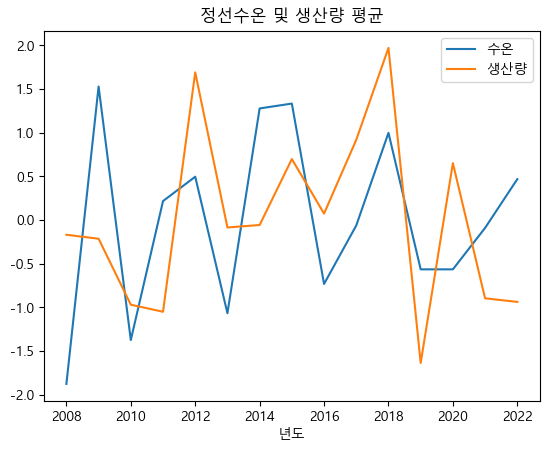

In [10]:
# 수온 - 0 / 생산량 - 1
plt.figure()


plt.title('정선수온 및 생산량 평균')
plt.xlabel('년도')
plt.plot(standard_data_jung['년도'],standard_data_jung['수온'],label='수온')
plt.plot(standard_data_jung['년도'],standard_data_jung['생산량'],label='생산량')
plt.legend()
plt.show()